In [ ]:
import sys
from pathlib import Path
sys.path.append(str(Path(__file__).resolve().parent.parent))

In [1]:
from src.pipe import ImagePreprocessor, AudioPreprocessor
from torchvision.io import read_video
import matplotlib.pyplot as plt

In [2]:
video_path = "../deepfake_detection/samples/bwdmzwhdnw.mp4"
video, audio, info = read_video(str(video_path), pts_unit="sec")
audio.shape

torch.Size([1, 480256])

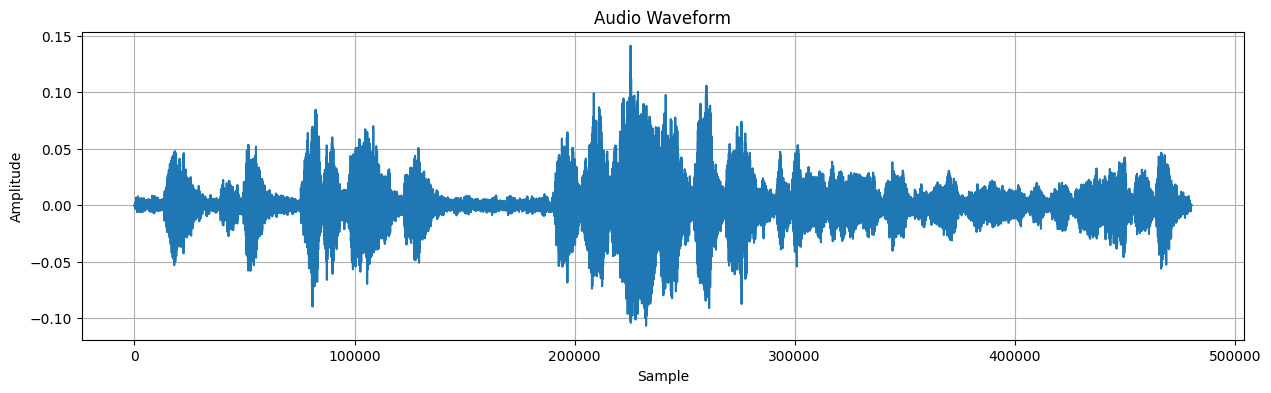

In [3]:
plt.figure(figsize=(15, 4))
plt.plot(audio[0].numpy())
plt.title("Audio Waveform")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

In [4]:
aud_proc = AudioPreprocessor(window_len=4, step=1, sample_rate=16000)

In [5]:
aud_tensor, valid_mask = aud_proc(audio, info.get("audio_fps", 16_000))

In [6]:
aud_tensor.shape, valid_mask.shape

(torch.Size([11, 1, 64000]), torch.Size([11]))

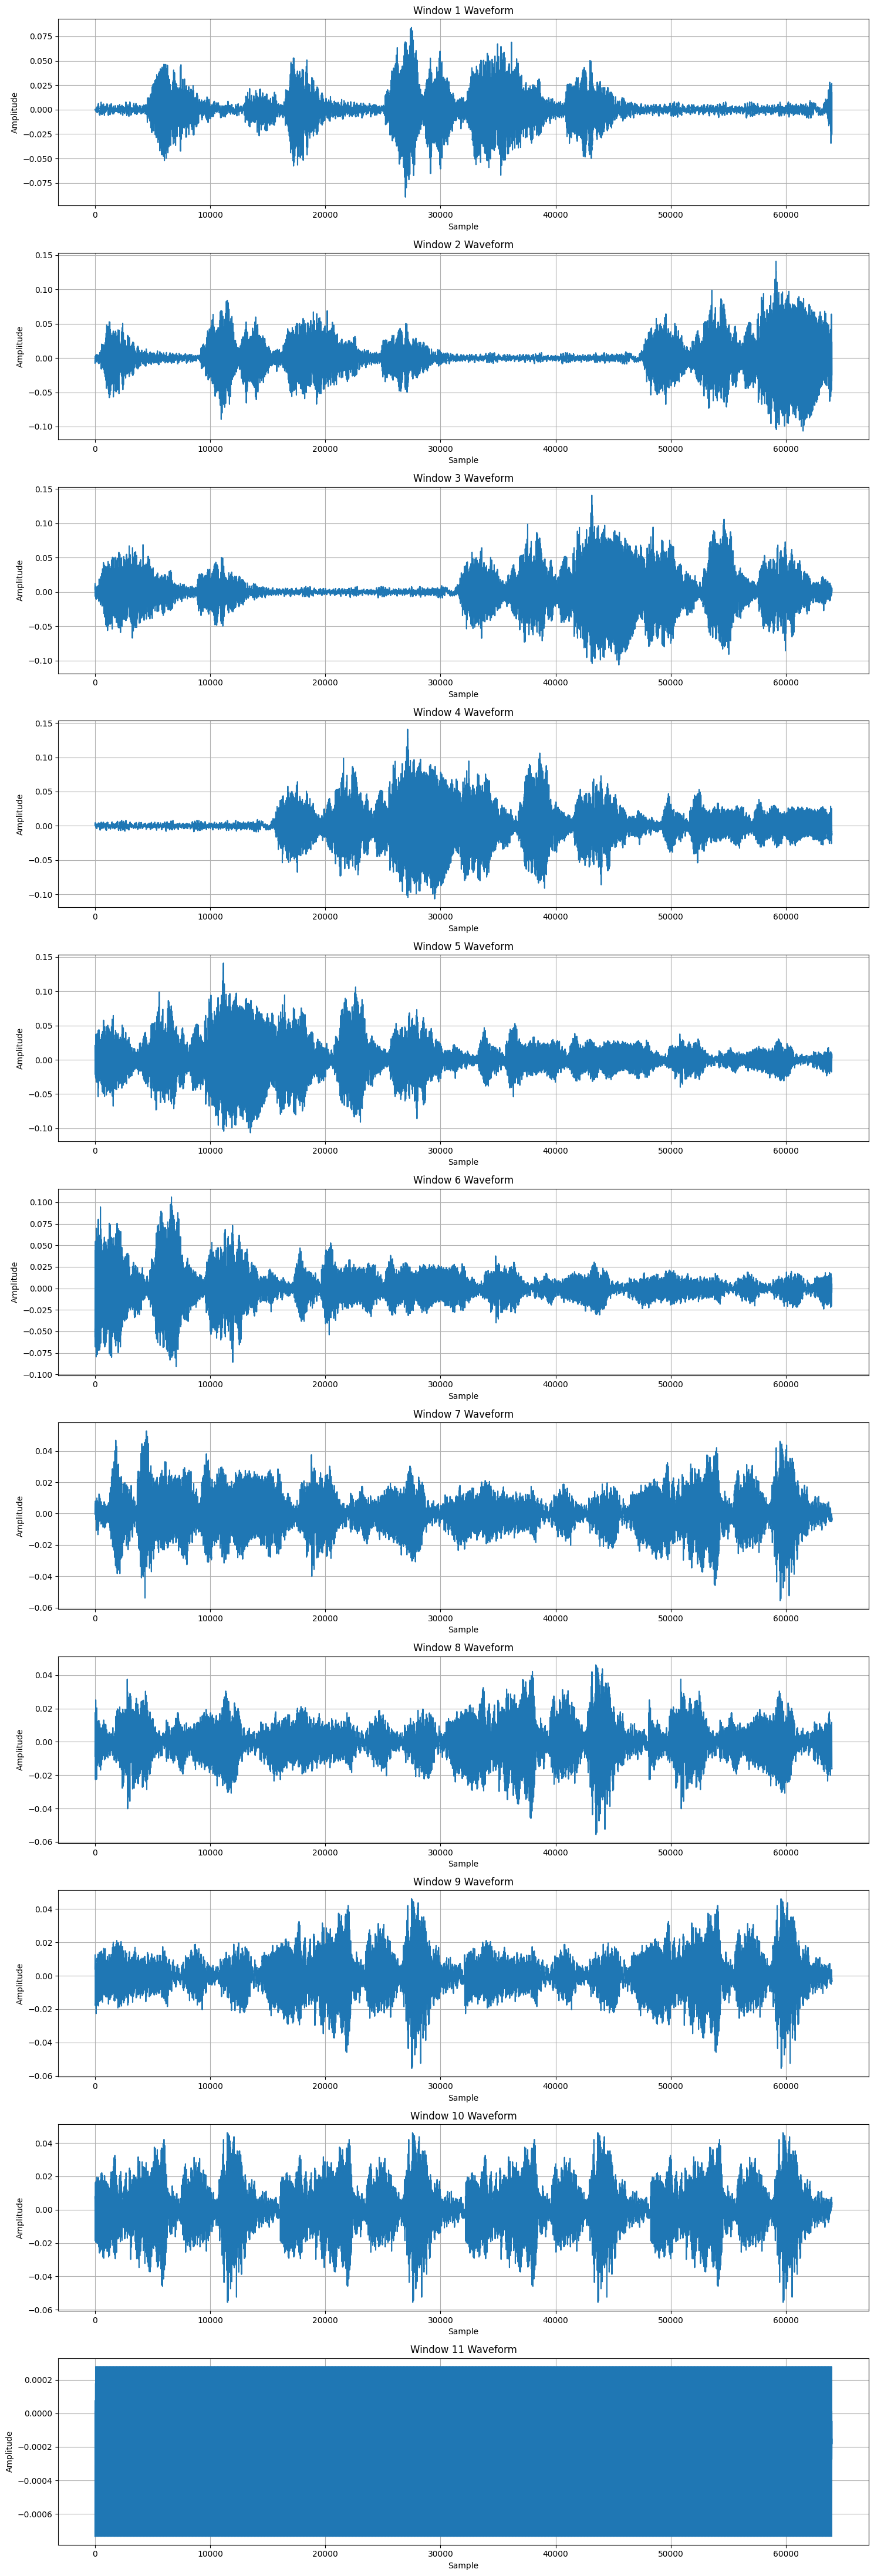

In [7]:
num_windows = aud_tensor.shape[0]
plt.figure(figsize=(15, 4 * num_windows))

for i in range(num_windows):
    plt.subplot(num_windows, 1, i + 1)
    plt.plot(aud_tensor[i, 0].numpy())
    plt.title(f"Window {i+1} Waveform")
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
    plt.grid(True)

plt.tight_layout()
plt.show()

In [8]:
aud_proc = AudioPreprocessor(
    window_len=4, step=1, sample_rate=16000, device="cpu", use_vad=True
)

aud_tensor, valid_mask = aud_proc(audio, info.get("audio_fps", 16_000))
aud_tensor.shape, valid_mask.shape

Using cache found in /Users/filipstrozik/.cache/torch/hub/snakers4_silero-vad_master


(torch.Size([11, 1, 64000]), torch.Size([11]))

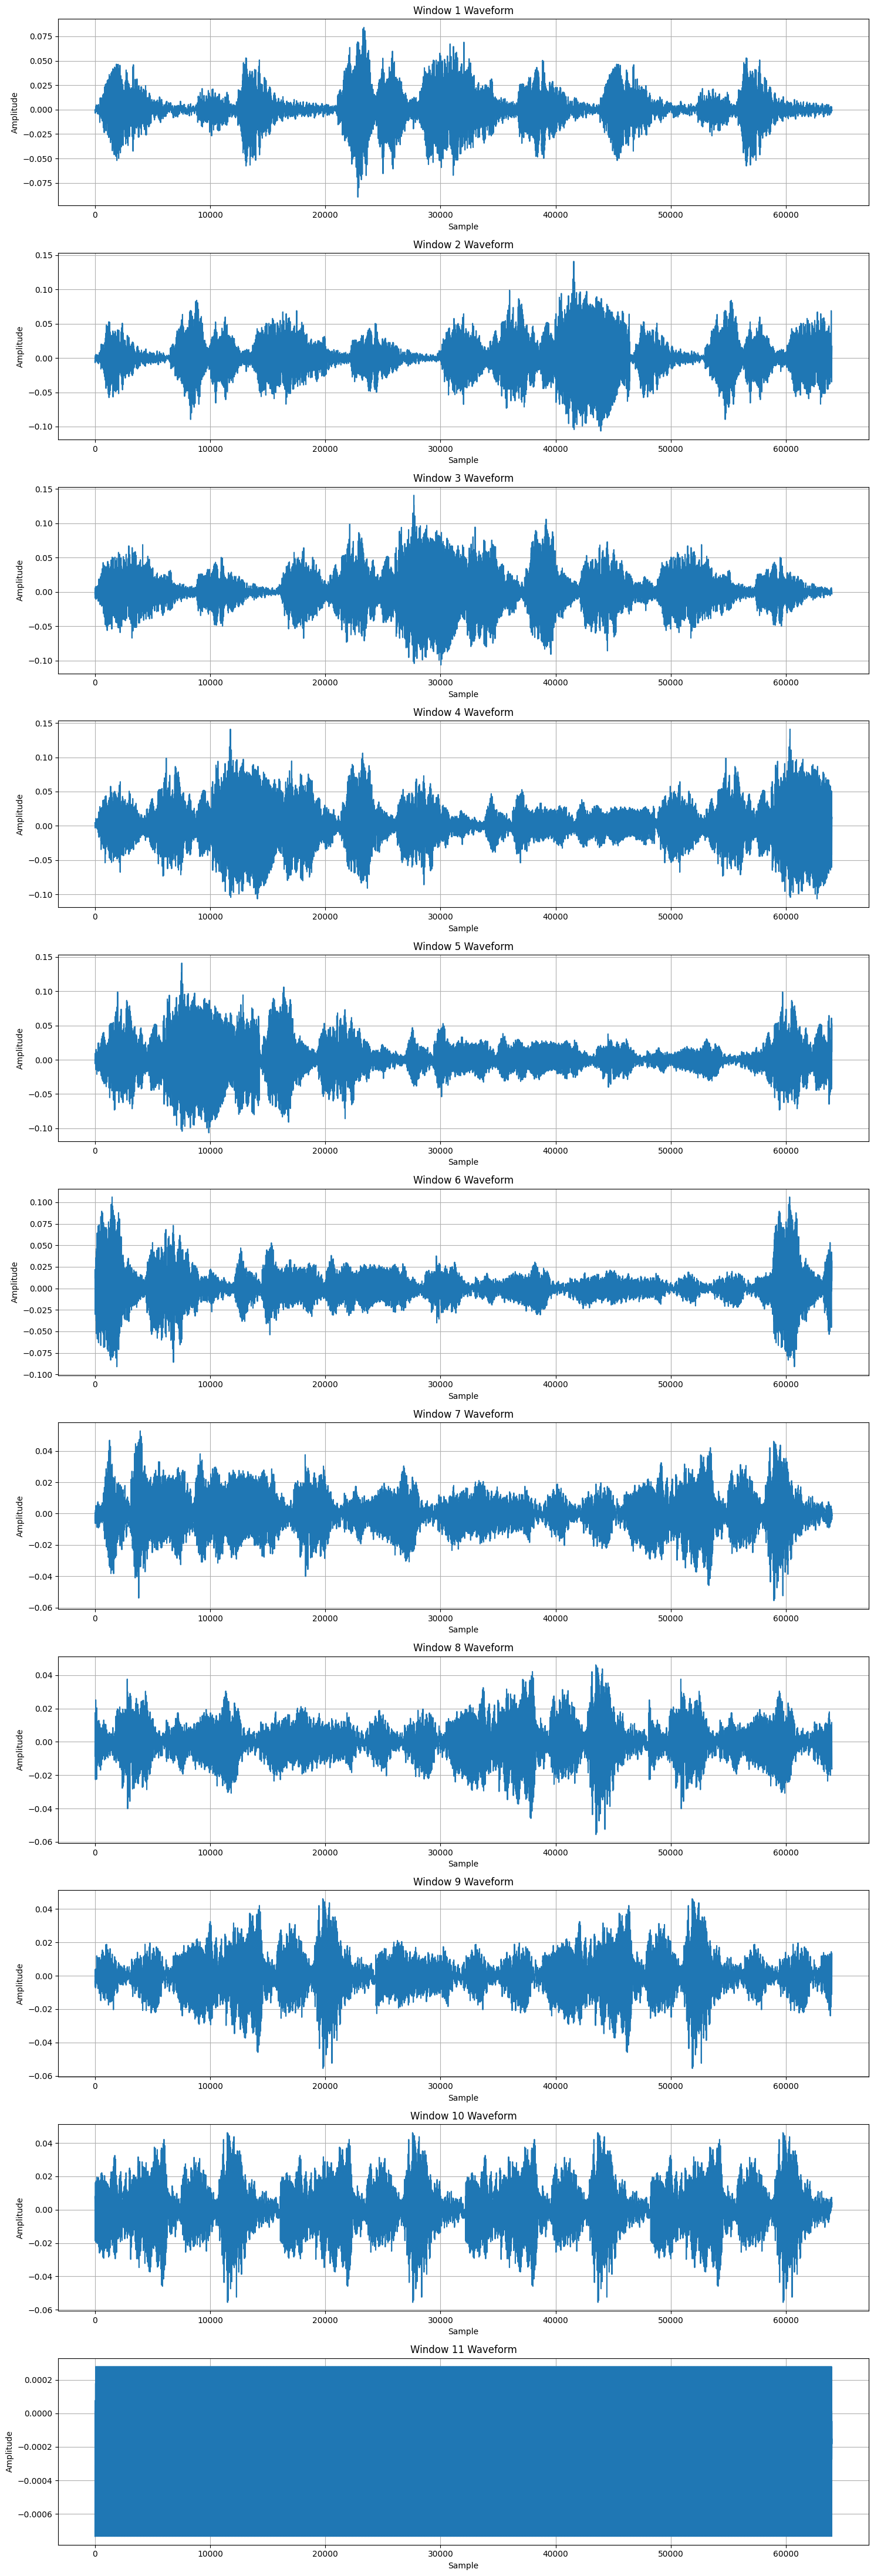

In [9]:
num_windows = aud_tensor.shape[0]
plt.figure(figsize=(15, 4 * num_windows))

for i in range(num_windows):
    plt.subplot(num_windows, 1, i + 1)
    plt.plot(aud_tensor[i, 0].numpy())
    plt.title(f"Window {i+1} Waveform")
    plt.xlabel("Sample")
    plt.ylabel("Amplitude")
    plt.grid(True)

plt.tight_layout()
plt.show()